#Laura Marcela Suarez Sanchez


#Seguridad en Bogotá

# Integracion de datos de diversas fuentes

## Instalacion de librerias

In [2]:
pip install requests pandas geopandas

##Importacion de librerias

In [3]:
import requests
import pandas as pd
import geopandas as gpd

# Lectura y limpieza Data Set's


Los archivos (nuse_df, nuse_tipificacion_df y cai_df) se subieron previamente a Github y se leyeron como objetos raw, la limpieza de cada uno de los archivos a trabajar se realizo con la libreria pandas de python.

### nuse_df

NUSE (numero unico de seguridad y emergencias) es un archivo en formato CSV que contiene informacion sobre las llamadas de los cuidadanos tramitadas al **C4** Bogota por medio de la linea **123** en un periodo comprendido de enero 2015 - abril 2024.

In [10]:
nuse_df = pd.read_csv(
    r"https://raw.githubusercontent.com/LauraSuarezS/TalentoTech/main/Data%20raw/NUSE.csv",
    encoding="latin-1",
    sep=";",
)
nuse_df["ID"] = nuse_df["ID"].astype("string")
nuse_df["TIPO_INCIDENTE"] = nuse_df["TIPO_INCIDENTE"].astype("string")
nuse_df["TIPO_DETALLE"] = nuse_df["TIPO_DETALLE"].astype("string")
nuse_df["LOCALIDAD"] = nuse_df["LOCALIDAD"].astype("string")
nuse_df["COD_UPZ"] = nuse_df["COD_UPZ"].astype("string")
nuse_df["UPZ"] = nuse_df["UPZ"].astype("string")
nuse_df = nuse_df.drop_duplicates()

nuse_df

<ipython-input-10-56b22738c1de>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  nuse_df = pd.read_csv(


,ID,ANIO,MES,TIPO_INCIDENTE,TIPO_DETALLE,COD_LOCALIDAD,LOCALIDAD,COD_UPZ,UPZ,CANT_INCIDENTES
0,20191216UPZ40701,2019,12,701,ABEJAS,16,PUENTE ARANDA,UPZ40,CIUDAD MONTES,3
1,20191213UPZ109701,2019,12,701,ABEJAS,13,TEUSAQUILLO,UPZ109,CIUDAD SALITRE ORIENTAL,1
2,20191211UPZ24701,2019,12,701,ABEJAS,11,SUBA,UPZ24,NIZA,1
3,20191211UPZ18701,2019,12,701,ABEJAS,11,SUBA,UPZ18,BRITALIA,1
4,20191211UPZ17701,2019,12,701,ABEJAS,11,SUBA,UPZ17,SAN JOSE DE BAVARIA,2
...,...,...,...,...,...,...,...,...,...,...
885911,20150101UPZ16906,2015,1,906,VIOLENCIA SEXUAL,1,USAQUÉN,UPZ16,SANTA BARBARA,1
885912,20150101UPZ13906,2015,1,906,VIOLENCIA SEXUAL,1,USAQUÉN,UPZ13,LOS CEDROS,4
885913,20150101UPZ12906,2015,1,906,VIOLENCIA SEXUAL,1,USAQUÉN,UPZ12,TOBERIN,3
885914,20150101UPZ11906,2015,1,906,VIOLENCIA SEXUAL,1,USAQUÉN,UPZ11,SAN CRISTOBAL NORTE,4


#### Validacion tipo de datos

In [16]:
nuse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885916 entries, 0 to 885915
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               885916 non-null  string
 1   ANIO             885916 non-null  int64 
 2   MES              885916 non-null  int64 
 3   TIPO_INCIDENTE   885916 non-null  string
 4   TIPO_DETALLE     885916 non-null  string
 5   COD_LOCALIDAD    885916 non-null  int64 
 6   LOCALIDAD        885916 non-null  string
 7   COD_UPZ          885916 non-null  string
 8   UPZ              885916 non-null  string
 9   CANT_INCIDENTES  885916 non-null  int64 
dtypes: int64(4), string(6)
memory usage: 67.6 MB


#### Validacion de columnas

In [17]:
nuse_df.columns

Index(['ID', 'ANIO', 'MES', 'TIPO_INCIDENTE', 'TIPO_DETALLE', 'COD_LOCALIDAD',
       'LOCALIDAD', 'COD_UPZ', 'UPZ', 'CANT_INCIDENTES'],
      dtype='object')

###nuse_tipificacion_df

Es un archivo en formato CSV, que contiene la informacion sobre la guia de tipificacion de los diferentes incidentes que son tramitados por el **C4**.

In [11]:
nuse_tipificacion_df = pd.read_csv(
    r"https://raw.githubusercontent.com/LauraSuarezS/TalentoTech/main/Data%20raw/NUSETipificacion.csv",
    encoding="latin-1",
    sep=";",
)
nuse_tipificacion_df["COD_INCIDENTE"] = nuse_tipificacion_df["COD_INCIDENTE"].astype(
    "string"
)
nuse_tipificacion_df["INCIDENTE"] = nuse_tipificacion_df["INCIDENTE"].astype("string")
nuse_tipificacion_df["INCIDENTE"] = nuse_tipificacion_df["INCIDENTE"].str.upper()
nuse_tipificacion_df["DEFINICION"] = nuse_tipificacion_df["DEFINICION"].astype("string")
nuse_tipificacion_df["DEFINICION"] = nuse_tipificacion_df["DEFINICION"].str.upper()
nuse_tipificacion_df = nuse_tipificacion_df.drop_duplicates()

nuse_tipificacion_df

,COD_INCIDENTE,INCIDENTE,DEFINICION
0,401,DESARME,PROGRAMA COORDINADO DIRECTAMENTE POR LA SECRET...
1,535,INFORMACIÓN CONFIDENCIAL,INFORMACIÓN QUE PUEDE CONDUCIR A LA CAPTURA O ...
2,601,ACCIDENTE CEREBRO VASCULAR,EVENTO DE ORIGEN CEREBRAL QUE SE MANIFIESTA PO...
3,602,CAÍDA DE ALTURA,SE UTILIZA ESTE CÓDIGO EN CASO DE CAÍDA DE ALT...
4,603,CONVULSIÓN,SE CARACTERIZAN POR MOVIMIENTOS INCONTROLADOS ...
...,...,...,...
90,977,VEHÍCULO RECUPERADO,SE REFIERE AL VEHÍCULO QUE HA SIDO REPORTADO C...
91,978,HALLAZGO DE EXPLOSIVOS,CONSISTE EN EL HALLAZGO DE ELEMENTOS QUE POR S...
92,982,ABORTO,CUANDO REPORTAN UN ESTABLECIMIENTO EN DONDE SE...
93,990,RESTOS HUMANOS,RESTOS HUMANOS O PARTES DE UN CADÁVER (ESQUELE...


#### Validacion tipo de datos

In [21]:
nuse_tipificacion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   COD_INCIDENTE  95 non-null     string
 1   INCIDENTE      95 non-null     string
 2   DEFINICION     95 non-null     string
dtypes: string(3)
memory usage: 2.4 KB


#### Validacion de columnas

In [23]:
nuse_tipificacion_df.columns

Index(['COD_INCIDENTE', 'INCIDENTE', 'DEFINICION'], dtype='object')

### cai_df

Es un archivo de formato Geojson, que contiene informacion los **CAI's** (comando de atencion inmediata) como su ubicacion, **UPZ** (unidades de planeamiento zonal) a la que pertenecen, horarios entre otros datos que permiten conocer detalles y caracteristicas de los mismos.

In [12]:
cai_response = requests.get(
    r"https://raw.githubusercontent.com/LauraSuarezS/TalentoTech/main/Data%20raw/CAI.geojson"
)
cai_df = gpd.read_file(cai_response.text)
cai_df["CAICOD_ENT"] = cai_df["CAICOD_ENT"].astype("int64")
cai_df["CAICOD_PRO"] = cai_df["CAICOD_PRO"].astype("int64")
cai_df["CAIFECHA_I"] = cai_df["CAIFECHA_I"].astype("datetime64[ns]")
cai_df["CAIFECHA_F"] = cai_df["CAIFECHA_F"].astype("datetime64[ns]")
cai_df["CAIDESCRIP"] = cai_df["CAIDESCRIP"].astype("string")
cai_df["CAIDESCRIP"] = cai_df["CAIDESCRIP"].str.upper()
cai_df["CAIEST_PRO"] = cai_df["CAIEST_PRO"].astype("string")
cai_df["CAIINTERV_"] = cai_df["CAIINTERV_"].astype("string")
cai_df["CAIDIR_SIT"] = cai_df["CAIDIR_SIT"].astype("string")
cai_df["CAIHORARIO"] = cai_df["CAIHORARIO"].astype("string")
cai_df["CAITELEFON"] = cai_df["CAITELEFON"].astype("Int64")
cai_df["CAIIUUPLAN"] = cai_df["CAIIUUPLAN"].astype("string")
cai_df["CAIIUSCATA"] = cai_df["CAIIUSCATA"].astype("Int64")
cai_df["CAIIULOCAL"] = cai_df["CAIIULOCAL"].astype("Int64")
cai_df["CAITEQUIPA"] = cai_df["CAITEQUIPA"].astype("string")
cai_df["CAITEQUIPA"] = cai_df["CAITEQUIPA"].str.upper()
cai_df["CAICELECTR"] = cai_df["CAICELECTR"].astype("string")
cai_df["CAICELECTR"] = cai_df["CAICELECTR"].str.upper()
cai_df["CAICONTACT"] = cai_df["CAICONTACT"].astype("string")
cai_df["CAICONTACT"] = cai_df["CAICONTACT"].str.upper()
cai_df["CAIPWEB"] = cai_df["CAIPWEB"].astype("string")
cai_df["CAIPWEB"] = cai_df["CAIPWEB"].str.upper()
cai_df["CAIIDENTIF"] = cai_df["CAIIDENTIF"].astype("string")
cai_df["CAINOMBRE"] = cai_df["CAINOMBRE"].astype("string")
cai_df["CAINOMBRE"] = cai_df["CAINOMBRE"].str.upper()
cai_df["CAIFECHA_C"] = cai_df["CAIFECHA_C"].astype("datetime64[ns]")
cai_df["CAIEASOCIA"] = cai_df["CAIEASOCIA"].astype("string")
cai_df["CAIEASOCIA"] = cai_df["CAIEASOCIA"].str.upper()
cai_df["CAIFUNCION"] = cai_df["CAIFUNCION"].astype("string")
cai_df["CAIFUNCION"] = cai_df["CAIFUNCION"].str.upper()
cai_df["CAISERVICI"] = cai_df["CAISERVICI"].astype("string")
cai_df["CAISERVICI"] = cai_df["CAISERVICI"].str.upper()

cai_campos_dict = {
    "OBJECTID": "OBJECTID",
    "CAIDESCRIP": "DESCRIPCION",
    "CAIHORARIO": "HORARIO",
    "CAITELEFON": "TELEFONO",
    "CAIIULOCAL": "IDENTIFICADOR_UNICO_LOCALIDAD",
    "CAICELECTR": "CORREO_ELECTRONICO",
    "CAICONTACT": "CONTACTO",
    "CAIPWEB": "PAGINA_WEB",
    "CAINOMBRE": "NOMBRE",
    "CAIFECHA_C": "FECHA_CORTE",
    "CAICOD_PLA": "CODIGO_PLAN",
    "CAICOD_PRO": "CODIGO_PROYECTO",
    "CAIANIO_GE": "ANIO",
    "CAIFECHA_I": "FECHA_INICIAL",
    "CAIFECHA_F": "FECHA_FINAL",
    "CAIEST_PRO": "ESTADO_PROYECTO",
    "CAIINTERV_E": "INTERVENCION_ESPACIO_PUBLICO",
    "CAIDIR_SIT": "DIRECCION_SITIO",
    "CAICOD_SIT": "IDENTIFICADOR_SEGPLAN",
    "CAITEQUIPA": "TIPO_EQUIPAMIENTO",
    "CAIEASOCIA": "EQUIPAMIENTO_ASOCIADO",
    "CAIFUNCION": "FUNCIONALIDAD",
    "CAISERVICI": "SERVICIO",
    "CAIIUUPLAN": "CODIGO_UPZ",
}

cai_df = cai_df.rename(columns=cai_campos_dict)
cai_df = cai_df.drop_duplicates()

cai_df

,CODIGO_PLAN,CAICOD_ENT,CODIGO_PROYECTO,ANIO,FECHA_INICIAL,FECHA_FINAL,DESCRIPCION,ESTADO_PROYECTO,CAIINTERV_,DIRECCION_SITIO,...,CORREO_ELECTRONICO,CONTACTO,PAGINA_WEB,CAIIDENTIF,NOMBRE,FECHA_CORTE,EQUIPAMIENTO_ASOCIADO,FUNCIONALIDAD,SERVICIO,geometry
0,5,137,7507,2023,2016-06-01,2023-12-31,CAI LACHES,TERM,NIES,DG 3C 8 05 ESTE,...,MEBOG.E3@POLICIA.GOV.CO,POLICÍA NACIONAL,HTTPS://WWW.POLICIA.GOV.CO/BOGOTA/DIRECTORIO,E03C06020,CAI LACHES,2024-05-02,NO APLICA,COERCION,UNIDAD POLICIAL CON RECURSOS HUMANOS Y MATERIA...,POINT (-74.06775 4.58531)
1,5,137,7507,2023,2016-06-01,2023-12-31,CAI TIERRA LINDA,TERM,NIES,CL 127C KR 49,...,MEBOG.E11@POLICIA.GOV.CO,POLICÍA NACIONAL,HTTPS://WWW.POLICIA.GOV.CO/BOGOTA/DIRECTORIO,E11C12017,CAI TIERRA LINDA,2024-05-02,NO APLICA,COERCION,UNIDAD POLICIAL CON RECURSOS HUMANOS Y MATERIA...,POINT (-74.05735 4.71165)
2,5,137,7507,2023,2016-06-01,2023-12-31,CAI VILLAS DE GRANADA,TERM,NIES,KR 112A 77A 30,...,MEBOG.E10@POLICIA.GOV.CO,POLICÍA NACIONAL,HTTPS://WWW.POLICIA.GOV.CO/BOGOTA/DIRECTORIO,E10C12023,CAI VILLAS DE GRANADA,2024-05-02,NO APLICA,COERCION,UNIDAD POLICIAL CON RECURSOS HUMANOS Y MATERIA...,POINT (-74.12295 4.71692)
3,5,137,7507,2023,2016-06-01,2023-12-31,CAI VILLA LUZ,TERM,NIES,KR 77A CL 64B,...,MEBOG.E10@POLICIA.GOV.CO,POLICÍA NACIONAL,HTTPS://WWW.POLICIA.GOV.CO/BOGOTA/DIRECTORIO,E10C13008,CAI VILLA LUZ,2024-05-02,NO APLICA,COERCION,UNIDAD POLICIAL CON RECURSOS HUMANOS Y MATERIA...,POINT (-74.10759 4.68131)
4,5,137,7507,2023,2016-06-01,2023-12-31,CAI GRANJAS,TERM,NIES,KR 69B CL 21A,...,MEBOG.E9@POLICIA.GOV.CO,POLICÍA NACIONAL,HTTPS://WWW.POLICIA.GOV.CO/BOGOTA/DIRECTORIO,E09C01002,CAI GRANJAS,2024-05-02,NO APLICA,COERCION,UNIDAD POLICIAL CON RECURSOS HUMANOS Y MATERIA...,POINT (-74.11796 4.65148)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,5,137,7507,2023,2016-06-01,2023-12-31,CAI SAN CARLOS,TERM,NIES,DG 51 SUR 18 A 40,...,MEBOG.E6@POLICIA.GOV.CO,POLICÍA NACIONAL,HTTPS://WWW.POLICIA.GOV.CO/BOGOTA/DIRECTORIO,E06C01002,CAI SAN CARLOS,2024-05-02,NO APLICA,COERCION,UNIDAD POLICIAL CON RECURSOS HUMANOS Y MATERIA...,POINT (-74.12969 4.56730)
149,5,137,7507,2023,2016-06-01,2023-12-31,CAI DISTRITAL,TERM,NIES,CL 1C SUR KR 8,...,MEBOG.E4@POLICIA.GOV.CO,POLICÍA NACIONAL,HTTPS://WWW.POLICIA.GOV.CO/BOGOTA/DIRECTORIO,E04C03007,CAI DISTRITAL,2024-05-02,NO APLICA,COERCION,UNIDAD POLICIAL CON RECURSOS HUMANOS Y MATERIA...,POINT (-74.08455 4.58562)
150,5,137,7507,2023,2016-06-01,2023-12-31,CAI VILLA NIDIA,TERM,NIES,CL 163A 6A 25,...,MEBOG.E1@POLICIA.GOV.CO,POLICÍA NACIONAL,HTTPS://WWW.POLICIA.GOV.CO/BOGOTA/DIRECTORIO,E01C08009,CAI VILLA NIDIA,2024-05-02,NO APLICA,COERCION,UNIDAD POLICIAL CON RECURSOS HUMANOS Y MATERIA...,POINT (-74.02257 4.73778)
151,5,137,7507,2023,2016-06-01,2023-12-31,CAI TOBERÍN,TERM,NIES,CL 164 KR 16C,...,MEBOG.E1@POLICIA.GOV.CO,POLICÍA NACIONAL,HTTPS://WWW.POLICIA.GOV.CO/BOGOTA/DIRECTORIO,E01C06031,CAI TOBERÍN,2024-05-02,NO APLICA,COERCION,UNIDAD POLICIAL CON RECURSOS HUMANOS Y MATERIA...,POINT (-74.03970 4.74369)


#### Validacion tipo de datos

In [24]:
cai_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CODIGO_PLAN                    153 non-null    int64         
 1   CAICOD_ENT                     153 non-null    int64         
 2   CODIGO_PROYECTO                153 non-null    int64         
 3   ANIO                           153 non-null    int64         
 4   FECHA_INICIAL                  153 non-null    datetime64[ns]
 5   FECHA_FINAL                    153 non-null    datetime64[ns]
 6   DESCRIPCION                    153 non-null    string        
 7   ESTADO_PROYECTO                153 non-null    string        
 8   CAIINTERV_                     153 non-null    string        
 9   DIRECCION_SITIO                153 non-null    string        
 10  IDENTIFICADOR_SEGPLAN          153 non-null    int64         
 11  HORARIO    

#### Validacion de columnas

In [25]:
cai_df.columns

Index(['CODIGO_PLAN', 'CAICOD_ENT', 'CODIGO_PROYECTO', 'ANIO', 'FECHA_INICIAL',
       'FECHA_FINAL', 'DESCRIPCION', 'ESTADO_PROYECTO', 'CAIINTERV_',
       'DIRECCION_SITIO', 'IDENTIFICADOR_SEGPLAN', 'HORARIO', 'TELEFONO',
       'CODIGO_UPZ', 'CAIIUSCATA', 'IDENTIFICADOR_UNICO_LOCALIDAD',
       'CAILONGITU', 'CAILATITUD', 'TIPO_EQUIPAMIENTO', 'CORREO_ELECTRONICO',
       'CONTACTO', 'PAGINA_WEB', 'CAIIDENTIF', 'NOMBRE', 'FECHA_CORTE',
       'EQUIPAMIENTO_ASOCIADO', 'FUNCIONALIDAD', 'SERVICIO', 'geometry'],
      dtype='object')

### Agrupacion de datos y creacion de subset

In [13]:
cai_upz_cant_df = (
    cai_df.groupby("CODIGO_UPZ", as_index=False)
    .size()
    .rename(columns={"size": "CANTIDAD_CAI"})
)

cai_upz_cant_df

,CODIGO_UPZ,CANTIDAD_CAI
0,UPZ100,2
1,UPZ101,2
2,UPZ102,3
3,UPZ106,2
4,UPZ11,1
...,...,...
85,UPZ98,3
86,UPZ99,2
87,UPZ990,1
88,UPZ994,1


#### Validacion tipo de datos

In [27]:
cai_upz_cant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CODIGO_UPZ    90 non-null     string
 1   CANTIDAD_CAI  90 non-null     int64 
dtypes: int64(1), string(1)
memory usage: 1.5 KB


#### Validacion de columnas

In [28]:
cai_upz_cant_df.columns

Index(['CODIGO_UPZ', 'CANTIDAD_CAI'], dtype='object')

# Join de datasets

El cruce de la información se hizo teniendo como principal el dataframe **nuse_df** ya que era el dataframe más grande y principal.

Se cruzó con **nuse_tipificacion_df** con el metodo left para preservar como principal a **nuse_df** teniendo en cuenta las llaves de cruce.

Por otro lado el dataframe resultante **result_security_df** se cruzó con una vez más con **cai_upz_cant_df** igual con el metodo left preservando la originalidad de **result_security_df**


In [40]:
result_security_df = nuse_df.merge(
    nuse_tipificacion_df, how="left", left_on="TIPO_INCIDENTE", right_on="COD_INCIDENTE"
)
result_security_df = result_security_df.merge(
    cai_upz_cant_df, how="left", left_on="COD_UPZ", right_on="CODIGO_UPZ"
)

result_security_df

,ID,ANIO,MES,TIPO_INCIDENTE,TIPO_DETALLE,COD_LOCALIDAD,LOCALIDAD,COD_UPZ,UPZ,CANT_INCIDENTES,COD_INCIDENTE,INCIDENTE,DEFINICION,CODIGO_UPZ,CANTIDAD_CAI
0,20191216UPZ40701,2019,12,701,ABEJAS,16,PUENTE ARANDA,UPZ40,CIUDAD MONTES,3,701,ABEJAS,MANEJO Y CONTROL DE ENJAMBRES DE ABEJAS UBICAD...,UPZ40,2.0
1,20191213UPZ109701,2019,12,701,ABEJAS,13,TEUSAQUILLO,UPZ109,CIUDAD SALITRE ORIENTAL,1,701,ABEJAS,MANEJO Y CONTROL DE ENJAMBRES DE ABEJAS UBICAD...,<NA>,NaN
2,20191211UPZ24701,2019,12,701,ABEJAS,11,SUBA,UPZ24,NIZA,1,701,ABEJAS,MANEJO Y CONTROL DE ENJAMBRES DE ABEJAS UBICAD...,UPZ24,1.0
3,20191211UPZ18701,2019,12,701,ABEJAS,11,SUBA,UPZ18,BRITALIA,1,701,ABEJAS,MANEJO Y CONTROL DE ENJAMBRES DE ABEJAS UBICAD...,UPZ18,2.0
4,20191211UPZ17701,2019,12,701,ABEJAS,11,SUBA,UPZ17,SAN JOSE DE BAVARIA,2,701,ABEJAS,MANEJO Y CONTROL DE ENJAMBRES DE ABEJAS UBICAD...,UPZ17,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885911,20150101UPZ16906,2015,1,906,VIOLENCIA SEXUAL,1,USAQUÉN,UPZ16,SANTA BARBARA,1,906,VIOLENCIA SEXUAL,EL CONCEPTO DE VIOLENCIA SEXUAL INCLUYE DIFERE...,UPZ16,2.0
885912,20150101UPZ13906,2015,1,906,VIOLENCIA SEXUAL,1,USAQUÉN,UPZ13,LOS CEDROS,4,906,VIOLENCIA SEXUAL,EL CONCEPTO DE VIOLENCIA SEXUAL INCLUYE DIFERE...,UPZ13,1.0
885913,20150101UPZ12906,2015,1,906,VIOLENCIA SEXUAL,1,USAQUÉN,UPZ12,TOBERIN,3,906,VIOLENCIA SEXUAL,EL CONCEPTO DE VIOLENCIA SEXUAL INCLUYE DIFERE...,UPZ12,1.0
885914,20150101UPZ11906,2015,1,906,VIOLENCIA SEXUAL,1,USAQUÉN,UPZ11,SAN CRISTOBAL NORTE,4,906,VIOLENCIA SEXUAL,EL CONCEPTO DE VIOLENCIA SEXUAL INCLUYE DIFERE...,UPZ11,1.0


#### Validacion tipo de datos

In [29]:
result_security_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57965 entries, 73041 to 752230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ANIO             57965 non-null  int64 
 1   MES              57965 non-null  int64 
 2   LOCALIDAD        57965 non-null  string
 3   UPZ              57965 non-null  string
 4   CANT_INCIDENTES  57965 non-null  int64 
 5   INCIDENTE        57965 non-null  string
 6   DEFINICION       57965 non-null  string
 7   CANTIDAD_CAI     57965 non-null  int64 
dtypes: int64(4), string(4)
memory usage: 4.0 MB


#### Validacion de columnas

In [30]:
result_security_df.columns

Index(['ANIO', 'MES', 'LOCALIDAD', 'UPZ', 'CANT_INCIDENTES', 'INCIDENTE',
       'DEFINICION', 'CANTIDAD_CAI'],
      dtype='object')

### Filtrado de columnas

A partir del filtrado de columnas, se pretende dejar informacion de valor y realizar una seleccion de delitos tales como riña, alteracion al orden publico, persona o vehiculo sospechoso y atraco/hurto en proceso, con el fin de realizar un analisis de datos y conocer el comportamiento de cada uno de los delitos seleccionados.

In [15]:
result_security_df = result_security_df[
    [
        "ANIO",
        "MES",
        "LOCALIDAD",
        "UPZ",
        "CANT_INCIDENTES",
        "INCIDENTE",
        "DEFINICION",
        "CANTIDAD_CAI",
    ]
]

result_security_df["CANTIDAD_CAI"] = (
    result_security_df["CANTIDAD_CAI"].fillna(0).astype("int64")
)

result_security_df = result_security_df[
    result_security_df["INCIDENTE"].isin(
        [
            "RIÑA",
            "ALTERACIÓN DEL ORDEN PÚBLICO",
            "PERSONA O VEHÍCULO SOSPECHOSO",
            "ATRACO / HURTO EN PROCESO",
        ]
    )
]

result_security_df

<ipython-input-15-4051b810f43f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_security_df["CANTIDAD_CAI"] = (


,ANIO,MES,LOCALIDAD,UPZ,CANT_INCIDENTES,INCIDENTE,DEFINICION,CANTIDAD_CAI
73041,2019,12,SIN LOCALIZACION,-,3,ALTERACIÓN DEL ORDEN PÚBLICO,ES TODO ACONTECIMIENTO O EVENTO QUE ALTERA EL ...,0
73042,2019,12,CIUDAD BOLÍVAR,JERUSALEM,18,ALTERACIÓN DEL ORDEN PÚBLICO,ES TODO ACONTECIMIENTO O EVENTO QUE ALTERA EL ...,1
73043,2019,12,CIUDAD BOLÍVAR,ISMAEL PERDOMO,21,ALTERACIÓN DEL ORDEN PÚBLICO,ES TODO ACONTECIMIENTO O EVENTO QUE ALTERA EL ...,2
73044,2019,12,CIUDAD BOLÍVAR,EL TESORO,8,ALTERACIÓN DEL ORDEN PÚBLICO,ES TODO ACONTECIMIENTO O EVENTO QUE ALTERA EL ...,1
73045,2019,12,CIUDAD BOLÍVAR,LUCERO,35,ALTERACIÓN DEL ORDEN PÚBLICO,ES TODO ACONTECIMIENTO O EVENTO QUE ALTERA EL ...,4
...,...,...,...,...,...,...,...,...
752226,2019,12,USAQUÉN,USAQUEN,82,ALTERACIÓN DEL ORDEN PÚBLICO,ES TODO ACONTECIMIENTO O EVENTO QUE ALTERA EL ...,2
752227,2019,12,USAQUÉN,LOS CEDROS,253,ALTERACIÓN DEL ORDEN PÚBLICO,ES TODO ACONTECIMIENTO O EVENTO QUE ALTERA EL ...,1
752228,2019,12,USAQUÉN,TOBERIN,154,ALTERACIÓN DEL ORDEN PÚBLICO,ES TODO ACONTECIMIENTO O EVENTO QUE ALTERA EL ...,1
752229,2019,12,USAQUÉN,SAN CRISTOBAL NORTE,225,ALTERACIÓN DEL ORDEN PÚBLICO,ES TODO ACONTECIMIENTO O EVENTO QUE ALTERA EL ...,1


#### Validacion tipo de datos

In [31]:
result_security_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57965 entries, 73041 to 752230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ANIO             57965 non-null  int64 
 1   MES              57965 non-null  int64 
 2   LOCALIDAD        57965 non-null  string
 3   UPZ              57965 non-null  string
 4   CANT_INCIDENTES  57965 non-null  int64 
 5   INCIDENTE        57965 non-null  string
 6   DEFINICION       57965 non-null  string
 7   CANTIDAD_CAI     57965 non-null  int64 
dtypes: int64(4), string(4)
memory usage: 4.0 MB


#### Validacion de columnas

In [32]:
result_security_df.columns

Index(['ANIO', 'MES', 'LOCALIDAD', 'UPZ', 'CANT_INCIDENTES', 'INCIDENTE',
       'DEFINICION', 'CANTIDAD_CAI'],
      dtype='object')

In [33]:
result_security_df["INCIDENTE"].unique()

<StringArray>
[ 'ALTERACIÓN DEL ORDEN PÚBLICO',     'ATRACO / HURTO EN PROCESO',
 'PERSONA O VEHÍCULO SOSPECHOSO',                          'RIÑA']
Length: 4, dtype: string

In [39]:
result_security_df.describe()

,ANIO,MES,CANT_INCIDENTES,CANTIDAD_CAI
count,57965.000000,57965.000000,57965.000000,57965.000000
mean,2019.313724,6.397084,164.156853,1.180574
std,2.699829,3.498320,233.393391,1.089033
min,2015.000000,1.000000,1.000000,0.000000
25%,2017.000000,3.000000,34.000000,0.000000
50%,2019.000000,6.000000,84.000000,1.000000
75%,2022.000000,9.000000,205.000000,2.000000
max,2024.000000,12.000000,8820.000000,5.000000


In [38]:
result_security_df.groupby(["INCIDENTE"]).size()

INCIDENTE
ALTERACIÓN DEL ORDEN PÚBLICO     14443
ATRACO / HURTO EN PROCESO        14350
PERSONA O VEHÍCULO SOSPECHOSO    14353
RIÑA                             14819
dtype: int64

### Exportacion Data a formato CSV

In [ ]:
result_security_df.to_csv(r"Data refinada\security.csv", sep=";", index=False)

# Visualizacion de datos

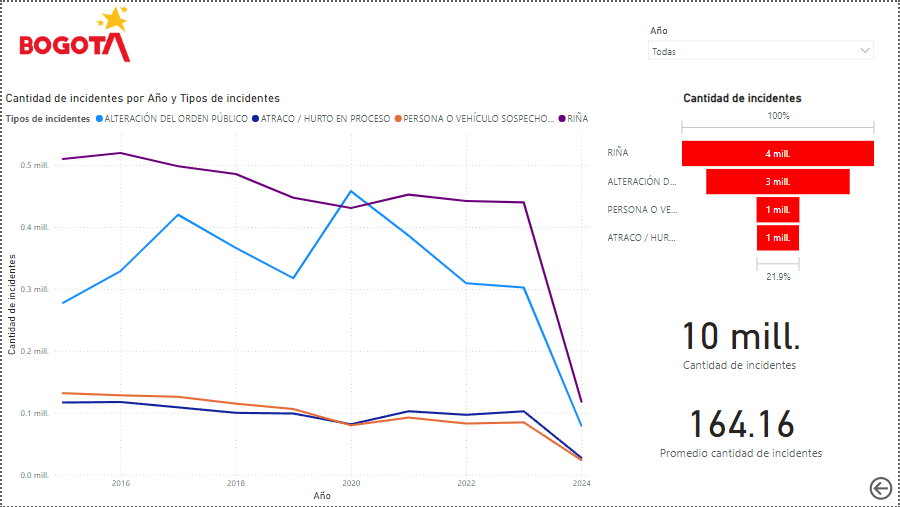

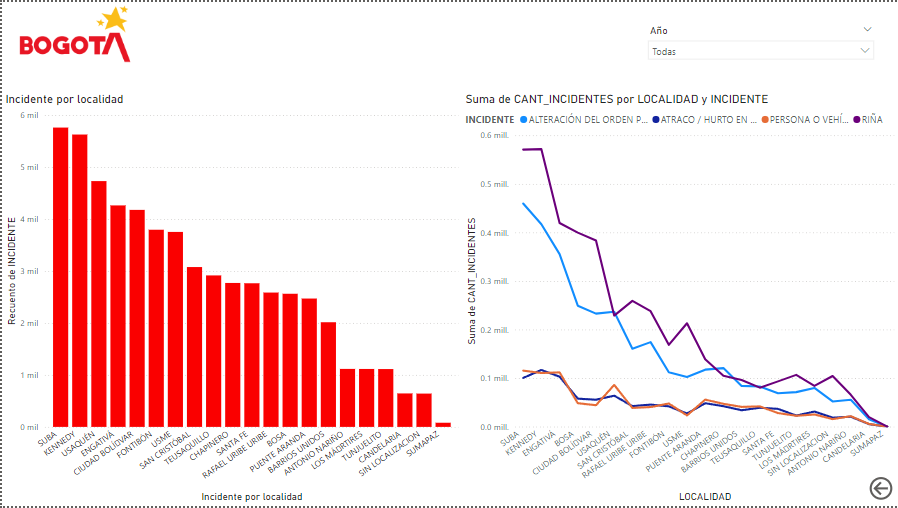

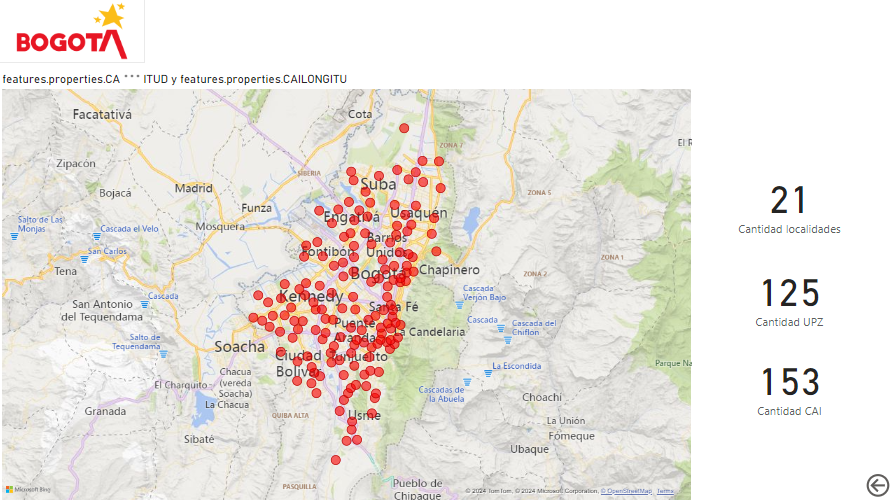

# Conclusiones

* Se determina que el año promedio de los registros de delitos es 2019 y el registro mas antiguo corresponde al año 2015. El primer Quarter de los incidentes se dan en 2017, el segundo en 2019 y el tercero en el año 2022 el registro de incidente mas reciente es 2024.
*Se encuentra reportes de 57.965 incidentes tramitados, con un promedio de 164.1 el registro que tiene la menor cantidad de reportes es 1 y el maximo es 8.820.
*Se evidencia que hay registros donde el promedio de casos atendidos por CAI es 1.18 el minimo es 0 y el maximo es 5.
* De acuerdo a los delitos selecionados se puede evidenciar que el incidente con mayor incidencia es Riña con una cifra de 14.819 y el de menor es atraco/hurto en proceso con una cifra de 14.350.
